In [1]:
from transformers import BertForSequenceClassification, BertTokenizerFast, Trainer, TrainingArguments, AutoTokenizer, AutoModel
from transformers import BertModel, BertTokenizer, get_linear_schedule_with_warmup
import seaborn as sns
import transformers
from torch.optim import AdamW
from transformers import BertModel, BertTokenizer, get_linear_schedule_with_warmup,get_cosine_schedule_with_warmup
import torch
import numpy as np
import pandas as pd
from tqdm import tqdm_notebook

import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from collections import defaultdict
from textwrap import wrap
from torch import nn, optim
from torch.utils.data import Dataset, DataLoader
from sklearn.metrics import f1_score
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import transformers
import torch
import numpy as np
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
import pandas as pd
import numpy as np
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn import metrics
from pprint import pprint
from sklearn.preprocessing import MultiLabelBinarizer
import numpy as np
import os, sys
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from collections import defaultdict
from nltk.stem import WordNetLemmatizer
from nltk.corpus import names
import nltk

import html
import numpy as np
import pandas as pd
import os
import time
import gc
import random
import torch
from IPython.display import HTML
import pyarabic.araby as araby


nltk.download('names')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
from nltk import word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
import re
from nltk.corpus import stopwords

import kornia
from  kornia import losses

from sklearn.cluster import SpectralClustering
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift
from sklearn.cluster import DBSCAN
from sklearn.cluster import MiniBatchKMeans
from numpy import unique
from numpy import where
from sklearn.metrics import silhouette_score


[nltk_data] Downloading package names to
[nltk_data]     /home/mohamedkhaled/nltk_data...
[nltk_data]   Package names is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/mohamedkhaled/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/mohamedkhaled/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /home/mohamedkhaled/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
file_dir = "/home/mohamedkhaled/Dialect identification"

In [3]:
def seed_everything(seed=1234):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
seed_everything()

In [4]:
model_name = ['aubmindlab/bert-large-arabertv02-twitter','UBC-NLP/MARBERTv2']
tokenizer = AutoTokenizer.from_pretrained(model_name[1])
PRE_TRAINED_MODEL_NAME = model_name[1]

In [5]:
all_train_data = pd.read_csv(file_dir+'/NADI2023_Release_Train/NADI2023_Release_Train/Subtask1/NADI2023_Subtask1_TRAIN.tsv', sep='\t')
all_dev_data = pd.read_csv(file_dir+'/NADI2023_Release_Train/NADI2023_Release_Train/Subtask1/NADI2023_Subtask1_DEV.tsv', sep='\t')

In [6]:
all_train_data.rename(columns={'#2_content':'text', '#3_label':'label'}, inplace=True)
all_dev_data.rename(columns={'#2_content':'text', '#3_label':'label'}, inplace=True)

In [7]:
all_train_data

,#1_id,text,label
0,subtask1_train_1,USER روتلج علمود جنسيه,Iraq
1,subtask1_train_2,النت في عمان يذكرني ببطاقه الافق مال NUM ريالا...,Oman
2,subtask1_train_3,USER انا كنصراوي لاالوم اخواني النصراويه بتشجي...,Saudi_Arabia
3,subtask1_train_4,دوله اسرائيل قائمه علي ضعفنا يوم ما نتوحد ونقو...,Palestine
4,subtask1_train_5,USER لو تقابلنا بعد طول الغياب ضمني ما فيني حي...,Bahrain
...,...,...,...
17995,subtask1_train_17996,USER شكد سفله تثمين الخطوات اولاد وين الخدمات ...,Iraq
17996,subtask1_train_17997,USER القايد صالح راهو يلهي فيك فالعلم والهويه ...,Algeria
17997,subtask1_train_17998,وهسه وينك كالو باخر الدنيا حلم باجر تشوفه جيت ...,Iraq
17998,subtask1_train_17999,وهو العيد يبقي عيد برده من غير البحر,Egypt


In [8]:
all_dev_data

,#1_id,text,label
0,subtask1_dev_1,سشن قيس من الصبح مثل واحد يتريك باجه,Iraq
1,subtask1_dev_2,امي لماا تناادي بتحكي كل الاسماء يلي بالبيت ...,Palestine
2,subtask1_dev_3,باذن الله يتوج هذا العمل الجبار باغلي بطولات ا...,Saudi_Arabia
3,subtask1_dev_4,USER تريد تساعد عامل النظافه شيل زبالتك يا زبا...,Oman
4,subtask1_dev_5,شقتلك انا راح تفوزون بالراحه URL,Kuwait
...,...,...,...
1795,subtask1_dev_1796,USER فيه راجل ينور وشك وفيه راجل يطفيه URL,Egypt
1796,subtask1_dev_1797,انو شو هو الانجاز يلي ممكن حقق بسنه,Lebanon
1797,subtask1_dev_1798,USER منت لاقي بشر معصوم غير الرسول خل صدرك شما...,Saudi_Arabia
1798,subtask1_dev_1799,من تراب لتراب عامڷين حاڷگۉ مصبۉغين بذهب ڷڷيشش ...,Jordan


In [9]:
url_regexes = [
    r"(http(s)?:\/\/.)?(www\.)?[-a-zA-Z0-9@:%._\+~#=]{2,256}\.[a-z]{2,6}\b([-a-zA-Z0-9@:%_\+.~#?&//=]*)",
    r"@(https?|ftp)://(-\.)?([^\s/?\.#-]+\.?)+(/[^\s]*)?$@iS",
    r"http[s]?://[a-zA-Z0-9_\-./~\?=%&]+",
    r"www[a-zA-Z0-9_\-?=%&/.~]+",
    r"[a-zA-Z]+\.com",
    r"(?=http)[^\s]+",
    r"(?=www)[^\s]+",
    r"://",
]

user_mention_regex = r"@[\w\d]+"
email_regexes = [r"[\w-]+@([\w-]+\.)+[\w-]+", r"\S+@\S+"]
redundant_punct_pattern = (
    r"([!\"#\$%\'\(\)\*\+,\.:;\-<=·>?@\[\\\]\^_ـ`{\|}~—٪’،؟`୍“؛”ۚ【»؛\s+«–…‘]{2,})"
)
regex_tatweel = r"(\D)\1{2,}"
rejected_chars_regex = r"^[0-9\a-zA-Z\[\]!\"#\$%\'\(\)\*\+,\.:;\-<=·>?@\[\\\]\^_ـ`{\|}~:—٪’،؟`୍“؛”ۚ»؛\s+«–…‘]"

regex_url_step1 = r"(?=http)[^\s]+"
regex_url_step2 = r"(?=www)[^\s]+"
regex_url = r"(http(s)?:\/\/.)?(www\.)?[-a-zA-Z0-9@:%._\+~#=]{2,256}\.[a-z]{2,6}\b([-a-zA-Z0-9@:%_\+.~#?&//=]*)"
regex_mention = r"@[\w\d]+"
regex_email = r"\S+@\S+"

chars_regex = r"0-9\u0621-\u063A\u0640-\u066C\u0671-\u0674a-zA-Z\[\]!\"#\$%\'\(\)\*\+,\.:;\-<=·>?@\[\\\]\^_ـ`{\|}~—٪’،؟`୍“؛”ۚ»؛\s+«–…‘"

white_spaced_double_quotation_regex = r'\"\s+([^"]+)\s+\"'
white_spaced_single_quotation_regex = r"\'\s+([^']+)\s+\'"
white_spaced_back_quotation_regex = r"\`\s+([^`]+)\s+\`"
white_spaced_em_dash = r"\—\s+([^—]+)\s+\—"

left_spaced_chars = r" ([\]!#\$%\),\.:;\?}٪’،؟”؛…»·])"
right_spaced_chars = r"([\[\(\{“«‘*\~]) "
left_and_right_spaced_chars = r" ([\+\-\<\=\>\@\\\^\_\|\–]) "
replace_urls_emails_mentions=True
strip_tashkeel=True
strip_tatweel=True
insert_white_spaces=True
remove_elongation=True
remove_html_markup=True


def preprocess(text):
    """
    Preprocess takes an input text line an applies the same preprocessing used in AraBERT
                        pretraining
    Args:
        text (:obj:`str`): inout text string
    Returns:
        string: A preprocessed string depending on which model was selected
    """


    text = str(text)
    text = html.unescape(text)
    if strip_tashkeel:
        text = araby.strip_tashkeel(text)
    if strip_tatweel:
        text = araby.strip_tatweel(text)

    if replace_urls_emails_mentions:
        # replace all possible URLs
        for reg in url_regexes:
            text = re.sub(reg, " رابط ", text)
        # REplace Emails with [بريد]
        for reg in email_regexes:
            text = re.sub(reg, " بريد ", text)
        # replace mentions with [مستخدم]
        text = re.sub(user_mention_regex, "", text)

    if remove_html_markup:
        # remove html line breaks
        text = re.sub("<br />", " ", text)
        # remove html markup
        text = re.sub("</?[^>]+>", " ", text)

    # remove repeated characters >2
    if remove_elongation:
        text = _remove_elongation(text)

    # insert whitespace before and after all non Arabic digits or English Digits and Alphabet and the 2 brackets
    if insert_white_spaces:
        text = re.sub(
            "([^0-9\u0621-\u063A\u0641-\u064A\u0660-\u0669a-zA-Z\[\]])",
            r" \1 ",
            text,
        )

        # insert whitespace between words and numbers or numbers and words
        text = re.sub(
            "(\d+)([\u0621-\u063A\u0641-\u064A\u0660-\u066C]+)", r" \1 \2 ", text
        )
        text = re.sub(
            "([\u0621-\u063A\u0641-\u064A\u0660-\u066C]+)(\d+)", r" \1 \2 ", text
        )


    text = re.sub(rejected_chars_regex, "", text)

    # remove extra spaces
    # text = _remove_redundant_punct(text)
    text = " ".join(text.replace("\uFE0F", "").split())
    text = re.sub('[a-zA-Z|#|<|>|.|||//|:]'," ",text)
    # ALl the other models dont require Farasa Segmentation
    text = re.sub(r"[a-zA-Z]+", " ",text)
    text = re.sub("\d+","",text)
    text = re.sub("[┊┊•°°•´¸•´¨¸•¨¸•]"," ",text)
    text = re.sub("[ŁÀÁÂÃÄÅÆÇÈÉÊËÌÍÎÏÐÑÒÓÔÕÖØÙÚÛÜÝÞßïîíìëêéèçæåäãâáàðñòóôõöøùúûüýþÿďĎčČċĊĉĈćĆąĄăĂāĀĐđĒēĔĕĖėĘęĚěĜĝĞğįĭĬīĪĩĨħĦĥĤģĢġĠİıĲĳĴĵĶķĸĹĺĻļĽľĿŏŎōŌŋŊŉňņŅńŃłŁŀŐőŒœŔŕŖŗŘřŚśŜŝŞşůŮŭŬūŪũŨŧŦťŤţšŠŰűŲųŴŵŶŷŸŹźŻżŽžſ]"," ", text)
    text = re.sub(r'[[\]]+', " ", text)
    text = re.sub(redundant_punct_pattern," ", text)
    text = text.strip()

    return text



def _remove_elongation(text):
    """
    :param text:  the input text to remove elongation
    :return: delongated text
    """
    # loop over the number of times the regex matched the text
    for index_ in range(len(re.findall(regex_tatweel, text))):
        elongation = re.search(regex_tatweel, text)
        if elongation:
            elongation_pattern = elongation.group()
            elongation_replacement = elongation_pattern[0]
            elongation_pattern = re.escape(elongation_pattern)
            text = re.sub(
                elongation_pattern, elongation_replacement, text, flags=re.MULTILINE
            )
        else:
            break
    return text

def _remove_redundant_punct(text):
    text_ = text
    result = re.search(redundant_punct_pattern, text)
    dif = 0
    while result:
        sub = result.group()
        sub = sorted(set(sub), key=sub.index)
        sub = " " + "".join(list(sub)) + " "
        text = "".join(
            (text[: result.span()[0] + dif], sub, text[result.span()[1] + dif :])
        )
        text_ = "".join(
            (text_[: result.span()[0]], text_[result.span()[1] :])
        ).strip()
        dif = abs(len(text) - len(text_))
        result = re.search(redundant_punct_pattern, text_)
    text = re.sub(r"\s+", " ", text)
    return text.strip()

<>:85: SyntaxWarning: invalid escape sequence '\['
<>:92: SyntaxWarning: invalid escape sequence '\d'
<>:95: SyntaxWarning: invalid escape sequence '\d'
<>:107: SyntaxWarning: invalid escape sequence '\d'
<>:85: SyntaxWarning: invalid escape sequence '\['
<>:92: SyntaxWarning: invalid escape sequence '\d'
<>:95: SyntaxWarning: invalid escape sequence '\d'
<>:107: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipykernel_499417/583215642.py:85: SyntaxWarning: invalid escape sequence '\['
  "([^0-9\u0621-\u063A\u0641-\u064A\u0660-\u0669a-zA-Z\[\]])",
/tmp/ipykernel_499417/583215642.py:92: SyntaxWarning: invalid escape sequence '\d'
  "(\d+)([\u0621-\u063A\u0641-\u064A\u0660-\u066C]+)", r" \1 \2 ", text
/tmp/ipykernel_499417/583215642.py:95: SyntaxWarning: invalid escape sequence '\d'
  "([\u0621-\u063A\u0641-\u064A\u0660-\u066C]+)(\d+)", r" \1 \2 ", text
/tmp/ipykernel_499417/583215642.py:107: SyntaxWarning: invalid escape sequence '\d'
  text = re.sub("\d+","",text)


In [10]:
all_train_data.text= all_train_data.text.apply(preprocess)
all_dev_data.text = all_dev_data.text.apply(preprocess)

/tmp/ipykernel_499417/583215642.py:104: FutureWarning: Possible set union at position 15
  text = re.sub('[a-zA-Z|#|<|>|.|||//|:]'," ",text)
/tmp/ipykernel_499417/583215642.py:104: FutureWarning: Possible set union at position 16
  text = re.sub('[a-zA-Z|#|<|>|.|||//|:]'," ",text)
/tmp/ipykernel_499417/583215642.py:110: FutureWarning: Possible nested set at position 1
  text = re.sub(r'[[\]]+', " ", text)


In [11]:
all_train_data.text = all_train_data.apply(lambda x : re.sub(r'"',"",x['text']),axis=1)
all_dev_data.text = all_dev_data.apply(lambda x : re.sub(r'"',"",x['text']),axis=1)


all_train_data.text = all_train_data.apply(lambda x : re.sub(r"[#]+"," هاشتاج ",x['text']),axis=1)
all_dev_data.text = all_dev_data.apply(lambda x : re.sub(r"[#]+"," هاشتاج ",x['text']),axis=1)

In [21]:
all_train_data

,#1_id,text,label
0,subtask1_train_1,روتلج علمود جنسيه,9
1,subtask1_train_2,النت في عمان يذكرني ببطاقه الافق مال ريالات نو...,5
2,subtask1_train_3,انا كنصراوي لاالوم اخواني النصراويه بتشجيع اور...,0
3,subtask1_train_4,دوله اسرائيل قائمه علي ضعفنا يوم ما نتوحد ونقو...,10
4,subtask1_train_5,لو تقابلنا بعد طول الغياب ضمني ما فيني حيل اعاتبك,1
...,...,...,...
17995,subtask1_train_17996,شكد سفله تثمين الخطوات اولاد وين الخدمات وين ا...,9
17996,subtask1_train_17997,القايد صالح راهو يلهي فيك فالعلم والهويه الاما...,16
17997,subtask1_train_17998,وهسه وينك كالو باخر الدنيا حلم باجر تشوفه جيت ...,9
17998,subtask1_train_17999,وهو العيد يبقي عيد برده من غير البحر,13


In [13]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [18]:
all_train_data.label = all_train_data.label.apply({'Saudi_Arabia':0,'Bahrain':1, 'Qatar':2, 'Kuwait':3, 'UAE':4,
                                           'Oman':5, 'Yemen':6, 'Lebanon':7, 'Syria':8,
                                           'Iraq':9, 'Palestine':10, 'Jordan':11,
                                           'Libya':12, 'Egypt':13, 'Sudan':14, 'Tunisia':15,
                                           'Algeria':16, 'Morocco':17}.get)

all_dev_data.label = all_dev_data.label.apply({'Saudi_Arabia':0,'Bahrain':1, 'Qatar':2, 'Kuwait':3, 'UAE':4,
                                           'Oman':5, 'Yemen':6, 'Lebanon':7, 'Syria':8,
                                           'Iraq':9, 'Palestine':10, 'Jordan':11,
                                           'Libya':12, 'Egypt':13, 'Sudan':14, 'Tunisia':15,
                                           'Algeria':16, 'Morocco':17}.get)

class_name = all_train_data.label.unique().tolist()

In [19]:
class_name

[9, 5, 0, 10, 1, 13, 11, 12, 14, 4, 16, 3, 15, 7, 17, 6, 8, 2]

In [20]:
df_train, df_val = train_test_split(
  all_train_data,
  test_size=0.2,
  random_state= np.random.seed(1234),
)

In [36]:
sample_txt =all_train_data['text'][1]
tokens = tokenizer.tokenize(sample_txt)
token_ids = tokenizer.convert_tokens_to_ids(tokens)

In [22]:
encoding = tokenizer.encode_plus(
  sample_txt,
  max_length=26,
  add_special_tokens=True, # Add '[CLS]' and '[SEP]'
  return_token_type_ids=False,
  pad_to_max_length=True,
  return_attention_mask=True,
  return_tensors='pt',  # Return PyTorch tensors,
)
encoding.keys()

NameError: name 'sample_txt' is not defined

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


MAX LENGTH:  98


/tmp/ipykernel_499417/2874467712.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(token_lens)


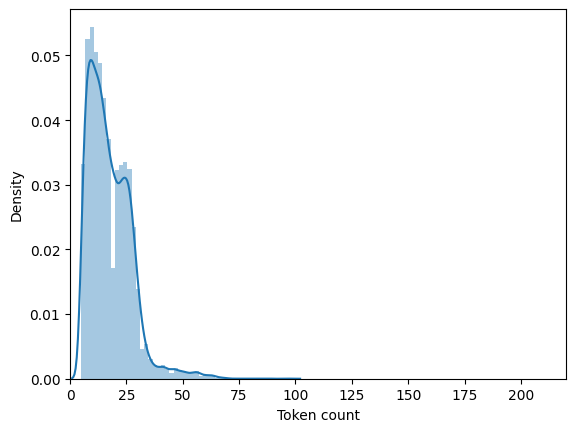

In [23]:
import matplotlib.pyplot as plt

token_lens = []
for txt in all_train_data.text:
  tokens = tokenizer.encode(txt, max_length=512)
  token_lens.append(len(tokens))
sns.distplot(token_lens)
plt.xlim([0, 220]);
plt.xlabel('Token count');
print("MAX LENGTH: ",max(token_lens))
MAX_LEN = max(token_lens)

In [24]:
class GPReviewDataset(Dataset):
  def __init__(self, reviews, targets, tokenizer, max_len):
    self.reviews = reviews
    self.targets = targets
    self.tokenizer = tokenizer
    self.max_len = max_len
  def __len__(self):
    return len(self.reviews)
  def __getitem__(self, item):
    review = str(self.reviews[item])
    target = self.targets[item]
    encoding = self.tokenizer.encode_plus(
      review,
      add_special_tokens=True,
      max_length=self.max_len,
      return_token_type_ids=False,
      pad_to_max_length=True,
      return_attention_mask=True,
      return_tensors='pt',
    )
    return {
      'review_text': review,
      'input_ids': encoding['input_ids'].flatten(),
      'attention_mask': encoding['attention_mask'].flatten(),
      'targets': torch.tensor(target, dtype=torch.long)
    }

In [25]:
## Random Version

def create_data_loader(df, tokenizer, max_len, batch_size):
  ds = GPReviewDataset(
    reviews=df.text.to_numpy(),
    targets=df.label.to_numpy(),
    tokenizer=tokenizer,
    max_len=max_len
  )
  return DataLoader(
    ds,
    batch_size=batch_size,
    shuffle=True
  )

def create_test_data_loader(df, tokenizer, max_len, batch_size):
  ds = GPReviewDataset(
    reviews=df.text.to_numpy(),
    targets=df.label.to_numpy(),
    tokenizer=tokenizer,
    max_len=max_len
  )
  return DataLoader(
    ds,
    batch_size=batch_size,
  )

In [26]:
def create_loader(BATCH_SIZE):

  train_data_loader = create_data_loader(df_train, tokenizer, MAX_LEN, BATCH_SIZE)
  val_data_loader = create_data_loader(df_val, tokenizer, MAX_LEN, BATCH_SIZE)
  test_data_loader = create_test_data_loader(all_dev_data, tokenizer, MAX_LEN, BATCH_SIZE)

  return train_data_loader,val_data_loader, test_data_loader

In [27]:
import torch
import torch.nn.functional as F

class SupervisedContrastiveLoss(torch.nn.Module):
    def __init__(self, temperature=0.07):
        super(SupervisedContrastiveLoss, self).__init__()
        self.temperature = temperature

    def forward(self, features, labels):
        device = features.device
        labels = labels.contiguous().view(-1, 1)
        mask = torch.eq(labels, labels.T).float().to(device)

        anchor_dot_contrast = torch.div(
            torch.matmul(features, features.T),
            self.temperature
        )

        # for numerical stability
        logits_max, _ = torch.max(anchor_dot_contrast, dim=1, keepdim=True)
        logits = anchor_dot_contrast - logits_max.detach()

        # mask out self-contrast cases
        logits_mask = torch.ones_like(mask) - torch.eye(mask.size(0)).to(device)
        mask = mask * logits_mask

        # compute log_prob
        exp_logits = torch.exp(logits) * logits_mask
        log_prob = logits - torch.log(exp_logits.sum(1, keepdim=True) + 1e-8)

        # compute mean of log-likelihood over positive
        mean_log_prob_pos = (mask * log_prob).sum(1) / (mask.sum(1) + 1e-8)

        return -mean_log_prob_pos.mean()

In [40]:
class SentimentClassifier(nn.Module):
  def __init__(self, n_classes, drop_value):
    super(SentimentClassifier, self).__init__()
    self.bert = AutoModel.from_pretrained(PRE_TRAINED_MODEL_NAME)
    hidden_size = self.bert.config.hidden_size
    self.drop = nn.Dropout(p=drop_value)

    # Projection head for contrastive loss
    self.projection = nn.Sequential(
        nn.Linear(hidden_size, hidden_size),
        nn.ReLU(),
        nn.Linear(hidden_size, 128)  # Reduced dimension for contrastive learning
    )

    # Classifier head
    self.classifier = nn.Sequential(
        nn.Linear(hidden_size, hidden_size),
        nn.ReLU(),
        nn.Dropout(p=drop_value),
        nn.Linear(hidden_size, n_classes)
    )

  def forward(self, input_ids, attention_mask):
    outputs = self.bert(
      input_ids=input_ids,
      attention_mask=attention_mask
    )
    
    pooled_output = outputs['pooler_output']
    dropped = self.drop(pooled_output)

    # Get embeddings for contrastive loss
    contrastive_features = self.projection(dropped)  # shape: [batch_size, 128]
    normed_features = nn.functional.normalize(contrastive_features, dim=1)

    # Classification output
    logits = self.classifier(dropped)

    return logits, normed_features

In [41]:
model = SentimentClassifier(len(class_name),0.3)
model = model.to(device)

In [30]:
## Linear
def optimization(learning_rate,EPOCHS,model,train_data_loader,num_warmup_steps):

  optimizer = AdamW(model.parameters(),lr=learning_rate )
  total_steps = len(train_data_loader) * EPOCHS
  scheduler = get_linear_schedule_with_warmup(
    optimizer,
    num_warmup_steps = num_warmup_steps,
    num_training_steps=total_steps
  )
  # loss_fn = nn.CrossEntropyLoss(weight=weights).to(device)
  # loss_fn = FocalLoss(alpha=0.5, gamma=2.0, reduction='mean')
  # loss_fn = FocalLossLs(alpha=0.5, gamma=2.0, reduction='mean')
  # loss_fn = DiceLoss()
  # loss_fn = BinaryVSLoss()
  loss_fn = nn.CrossEntropyLoss()
  # loss_fn = CrossEntropyLoss()
  # loss_fn = TverskyLoss(alpha=0.5, beta=0.5)
  return optimizer, scheduler, loss_fn

In [46]:
def train_epoch(
  model,
  data_loader,
  ce_loss_fn,
  sc_loss_fn,
  optimizer,
  device,
  scheduler,
  n_examples,
  contrastive_weight=0.5  # You can tune this weight
):
  model = model.train()
  losses = []
  correct_predictions = 0

  for d in data_loader:
    input_ids = d["input_ids"].to(device)
    attention_mask = d["attention_mask"].to(device)
    targets = d["targets"].to(device)

    logits, features = model(
      input_ids=input_ids,
      attention_mask=attention_mask
    )
    _, preds = torch.max(logits, dim=1)

    ce_loss = ce_loss_fn(logits, targets)
    sc_loss = sc_loss_fn(features, targets)
    loss = ce_loss + contrastive_weight * sc_loss

    correct_predictions += torch.sum(preds == targets)
    losses.append(loss.item())

    loss.backward()
    nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
    optimizer.step()
    scheduler.step()
    optimizer.zero_grad()

  return correct_predictions.double() / n_examples, np.mean(losses)

In [48]:
from sklearn.metrics import f1_score
import numpy as np
import torch

import torch.nn.functional as F

def eval_model(model, data_loader, ce_loss_fn, device, n_examples, use_scl=False, scl_loss_fn=None):
    model.eval()
    losses = []
    correct_predictions = 0
    all_preds = []
    all_targets = []

    with torch.no_grad():
        for d in data_loader:
            input_ids = d["input_ids"].to(device)
            attention_mask = d["attention_mask"].to(device)
            targets = d["targets"].to(device)

            outputs = model(
                input_ids=input_ids,
                attention_mask=attention_mask
            )

            if isinstance(outputs, tuple):  # expecting logits, embeddings
                logits, features = outputs
            else:
                logits = outputs
                features = None

            _, preds = torch.max(logits, dim=1)
            ce_loss = ce_loss_fn(logits, targets)

            # Optionally include supervised contrastive loss
            if use_scl and scl_loss_fn is not None and features is not None:
                scl_loss = scl_loss_fn(features, targets)
                loss = ce_loss + scl_loss
            else:
                loss = ce_loss

            correct_predictions += torch.sum(preds == targets)
            losses.append(loss.item())

            all_preds.extend(preds.cpu().numpy())
            all_targets.extend(targets.cpu().numpy())

    accuracy = correct_predictions.double() / n_examples
    avg_loss = np.mean(losses)
    macro_f1 = f1_score(all_targets, all_preds, average='macro', zero_division=0)

    return accuracy, avg_loss, macro_f1



In [34]:
from collections import defaultdict

def run_epochs():
  history = defaultdict(list)
  best_accuracy = 0

  config_defaults = {
    'epochs': 10,
    'BATCH_SIZE': 8,
    'learning_rate': 1e-5,
    'dropout': 0.3,
    'num_warmup_steps': 5,
    'seed': 42,
    'contrastive_weight': 0.95  # You can tune this
  }

  model = SentimentClassifier(len(class_name), config_defaults['dropout'])
  model = model.to(device)

  train_data_loader, val_data_loader, test_data_loader = create_loader(config_defaults['BATCH_SIZE'])

  optimizer, scheduler, _ = optimization(
    config_defaults['learning_rate'],
    config_defaults['epochs'],
    model,
    train_data_loader,
    config_defaults['num_warmup_steps']
  )

  # Define both loss functions
  ce_loss_fn = nn.CrossEntropyLoss()
  sc_loss_fn = SupervisedContrastiveLoss(temperature=0.07)

  for epoch in tqdm_notebook(range(config_defaults['epochs'])):
    print(f'Epoch {epoch + 1}/{config_defaults["epochs"]}')
    print('-' * 10)

    train_acc, train_loss = train_epoch(
      model,
      train_data_loader,
      ce_loss_fn,
      sc_loss_fn,
      optimizer,
      device,
      scheduler,
      len(df_train),
      contrastive_weight=config_defaults['contrastive_weight']
    )

    print(f'Train loss {train_loss:.4f} accuracy {train_acc:.4f}')

    val_acc, val_loss, macro_f1 = eval_model(
      model,
      val_data_loader,
      ce_loss_fn,  # Only use CE loss for evaluation
      device,
      len(df_val)
    )

    print(f'Val loss {val_loss:.4f} accuracy {val_acc:.4f} macro-f1 {macro_f1:.4f}')
    print()

    history['train_acc'].append(train_acc)
    history['train_loss'].append(train_loss)
    history['val_acc'].append(val_acc)
    history['val_loss'].append(val_loss)

    if val_acc > best_accuracy:
      torch.save(model.state_dict(), 'best_model_state.bin')
      best_accuracy = val_acc

  return model, train_data_loader, val_data_loader, test_data_loader, optimizer, scheduler, ce_loss_fn

In [35]:
model, train_data_loader, val_data_loader, test_data_loader, optimizer, scheduler, loss_fn = run_epochs()

/tmp/ipykernel_528459/4164718237.py:34: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for epoch in tqdm_notebook(range(config_defaults['epochs'])):


  0%|          | 0/10 [00:00<?, ?it/s]

Epoch 1/10
----------
Train loss 2.5861 accuracy 0.5115
Val loss 1.2809 accuracy 0.6967 macro-f1 0.6785

Epoch 2/10
----------


/home/mohamedkhaled/anaconda3/envs/ml/lib/python3.12/site-packages/transformers/tokenization_utils_base.py:2700: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


Train loss 1.2231 accuracy 0.7261
Val loss 0.7998 accuracy 0.7644 macro-f1 0.7596

Epoch 3/10
----------


/home/mohamedkhaled/anaconda3/envs/ml/lib/python3.12/site-packages/transformers/tokenization_utils_base.py:2700: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


Train loss 0.7480 accuracy 0.8282
Val loss 0.7171 accuracy 0.7983 macro-f1 0.7967

Epoch 4/10
----------


/home/mohamedkhaled/anaconda3/envs/ml/lib/python3.12/site-packages/transformers/tokenization_utils_base.py:2700: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


Train loss 0.5135 accuracy 0.8902
Val loss 0.7959 accuracy 0.8089 macro-f1 0.8072

Epoch 5/10
----------


/home/mohamedkhaled/anaconda3/envs/ml/lib/python3.12/site-packages/transformers/tokenization_utils_base.py:2700: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


Train loss 0.3635 accuracy 0.9317
Val loss 0.9944 accuracy 0.8022 macro-f1 0.8010

Epoch 6/10
----------


/home/mohamedkhaled/anaconda3/envs/ml/lib/python3.12/site-packages/transformers/tokenization_utils_base.py:2700: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


Train loss 0.2630 accuracy 0.9568
Val loss 1.1348 accuracy 0.8125 macro-f1 0.8106

Epoch 7/10
----------


/home/mohamedkhaled/anaconda3/envs/ml/lib/python3.12/site-packages/transformers/tokenization_utils_base.py:2700: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


Train loss 0.1915 accuracy 0.9742
Val loss 1.2747 accuracy 0.8092 macro-f1 0.8089

Epoch 8/10
----------


/home/mohamedkhaled/anaconda3/envs/ml/lib/python3.12/site-packages/transformers/tokenization_utils_base.py:2700: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


Train loss 0.1429 accuracy 0.9827
Val loss 1.3264 accuracy 0.8131 macro-f1 0.8124

Epoch 9/10
----------


/home/mohamedkhaled/anaconda3/envs/ml/lib/python3.12/site-packages/transformers/tokenization_utils_base.py:2700: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


Train loss 0.1176 accuracy 0.9874
Val loss 1.3399 accuracy 0.8131 macro-f1 0.8120

Epoch 10/10
----------


/home/mohamedkhaled/anaconda3/envs/ml/lib/python3.12/site-packages/transformers/tokenization_utils_base.py:2700: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


Train loss 0.0979 accuracy 0.9908
Val loss 1.3639 accuracy 0.8139 macro-f1 0.8132



In [63]:
with torch.no_grad():
    torch.cuda.empty_cache()